In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



2.0.0
Num GPUs Available:  2


In [2]:

import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

Using TensorFlow backend.


In [3]:
from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

10.0
7.6


In [4]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18146483014276725311, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5894133381781526319
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7851335780360475354
 physical_device_desc: "device: 1, name: GeForce RTX 2070, pci bus id: 0000:65:00.0, compute capability: 7.5"]

In [ ]:
#kept code to use multiple GPUs

c = []
for d in ['/device:GPU:0', '/device:GPU:1']:
    with tf.device(d):
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
        c.append(tf.matmul(a, b))
    with tf.device('/cpu:0'):
        sum = tf.add_n(c)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

init = tf.compat.v1.global_variables_initializer()
sess.run(init)

# Running the operations.
print(sess.run(sum))

## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [5]:
bos = datasets.load_boston()

In [6]:
bos

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [7]:
x = pd.DataFrame(bos['data'])

In [8]:
x.columns = bos['feature_names']

### This is a dataframe

In [9]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### This is an array

In [10]:
y = bos['target']

In [11]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data
Neural Networks are especially sensitive to data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1).

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12],scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns = x.columns.values)


Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

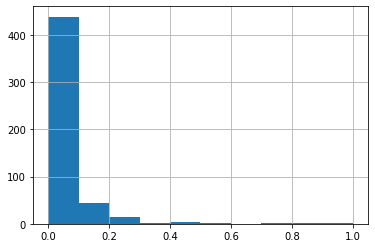

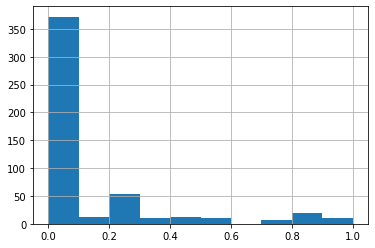

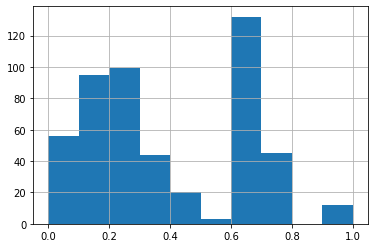

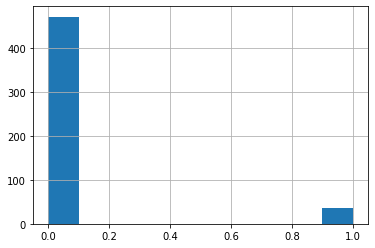

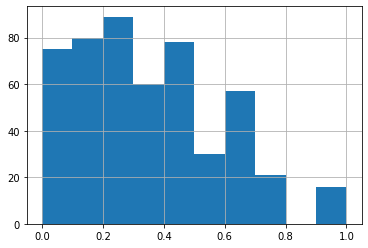

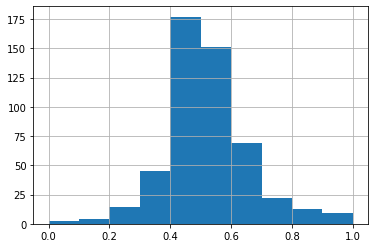

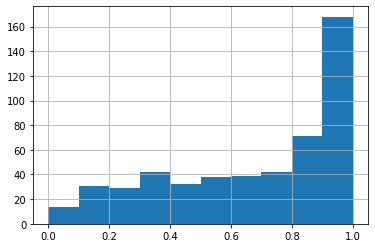

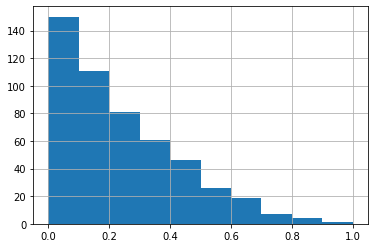

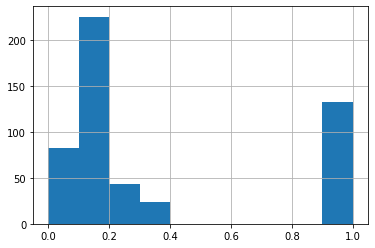

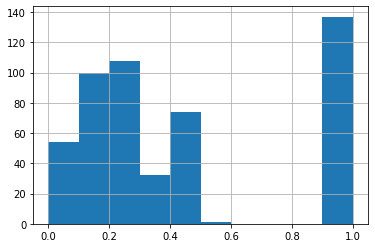

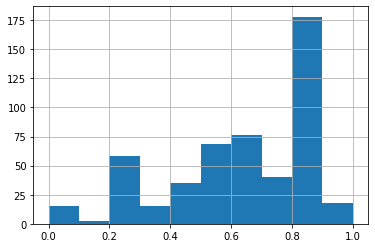

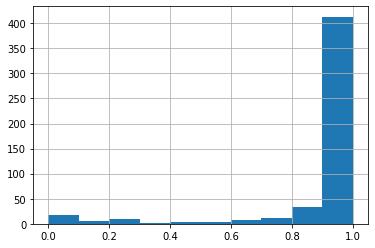

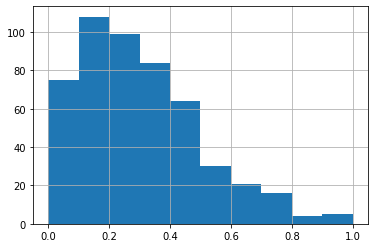

In [14]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model
Alright, lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in TensorFlow.  They are closely related, but this IS TensorFlow (package), not Keras (package).

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [15]:
model = tf.keras.Sequential()

model.add(layers.Dense(10, activation = 'sigmoid'))
model.add(layers.Dense(1))

## Compile Model
The compile step adds an optimizer (solver) and your loss metrics.

In [16]:
model.compile(optimizer='sgd',
             loss = 'mean_squared_error',
             metrics = ['mean_squared_error'])

## Fit Model
Now it is time to train.

In [17]:
model.fit(scaled_train_df.values, y, epochs = 10, batch_size = 32)

Train on 506 samples
Epoch 1/10
506/506 [==============================] - 1s 2ms/sample - loss: 208.4611 - mean_squared_error: 208.4611
Epoch 2/10
506/506 [==============================] - 0s 55us/sample - loss: 83.2188 - mean_squared_error: 83.2188
Epoch 3/10
506/506 [==============================] - 0s 55us/sample - loss: 76.0404 - mean_squared_error: 76.0405
Epoch 4/10
506/506 [==============================] - 0s 55us/sample - loss: 66.4201 - mean_squared_error: 66.4201
Epoch 5/10
506/506 [==============================] - 0s 55us/sample - loss: 58.4342 - mean_squared_error: 58.4342
Epoch 6/10
506/506 [==============================] - 0s 55us/sample - loss: 52.6222 - mean_squared_error: 52.6222
Epoch 7/10
506/506 [==============================] - 0s 55us/sample - loss: 48.2957 - mean_squared_error: 48.2957
Epoch 8/10
506/506 [==============================] - 0s 53us/sample - loss: 45.4939 - mean_squared_error: 45.4939
Epoch 9/10
506/506 [==============================] - 0s 5

## Visualize the data
TensorBoard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch.  TensorBoard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

In [18]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell TensorBoard where your logs are being stored**

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir /Users/bblanop/SMU/QTW/logs

In [19]:
model.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [20]:
model.fit(scaled_train_df.values, y, epochs=100, batch_size=20, callbacks=[tb])

Train on 506 samples
Epoch 1/100
506/506 [==============================] - 0s 757us/sample - loss: 38.9971 - mean_squared_error: 38.9971
Epoch 2/100
506/506 [==============================] - 0s 262us/sample - loss: 38.5495 - mean_squared_error: 38.5495
Epoch 3/100
506/506 [==============================] - 0s 179us/sample - loss: 38.2748 - mean_squared_error: 38.2748
Epoch 4/100
506/506 [==============================] - 0s 179us/sample - loss: 37.9425 - mean_squared_error: 37.9425
Epoch 5/100
506/506 [==============================] - 0s 179us/sample - loss: 37.5781 - mean_squared_error: 37.5781
Epoch 6/100
506/506 [==============================] - 0s 179us/sample - loss: 37.2850 - mean_squared_error: 37.2850
Epoch 7/100
506/506 [==============================] - 0s 181us/sample - loss: 36.9426 - mean_squared_error: 36.9426
Epoch 8/100
506/506 [==============================] - 0s 162us/sample - loss: 36.6404 - mean_squared_error: 36.6404
Epoch 9/100
506/506 [======================

506/506 [==============================] - 0s 146us/sample - loss: 24.3809 - mean_squared_error: 24.3809
Epoch 71/100
506/506 [==============================] - 0s 244us/sample - loss: 24.1735 - mean_squared_error: 24.1735
Epoch 72/100
506/506 [==============================] - 0s 148us/sample - loss: 24.0600 - mean_squared_error: 24.0600
Epoch 73/100
506/506 [==============================] - 0s 148us/sample - loss: 24.0031 - mean_squared_error: 24.0031
Epoch 74/100
506/506 [==============================] - 0s 146us/sample - loss: 23.8701 - mean_squared_error: 23.8701
Epoch 75/100
506/506 [==============================] - 0s 164us/sample - loss: 23.8088 - mean_squared_error: 23.8088
Epoch 76/100
506/506 [==============================] - 0s 197us/sample - loss: 23.7328 - mean_squared_error: 23.7328
Epoch 77/100
506/506 [==============================] - 0s 146us/sample - loss: 23.6067 - mean_squared_error: 23.6067
Epoch 78/100
506/506 [==============================] - 0s 162us/samp

## Validate!
SO far we have used the entire dataset to train.  We know that this is not acceptable.  In Neural Networks, rather than a cross validation, a validation split is done.  Lets repeat the experiment with splits.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=101)

In [22]:
model_final = tf.keras.Sequential()

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [23]:
model_final.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [24]:
model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=100, batch_size=20, callbacks=[tb])


Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 1ms/sample - loss: 272.7851 - mean_squared_error: 272.7851 - val_loss: 130.0838 - val_mean_squared_error: 130.0838
Epoch 2/100
404/404 [==============================] - 0s 306us/sample - loss: 79.9234 - mean_squared_error: 79.9234 - val_loss: 113.9526 - val_mean_squared_error: 113.9526
Epoch 3/100
404/404 [==============================] - 0s 306us/sample - loss: 77.3853 - mean_squared_error: 77.3853 - val_loss: 112.2700 - val_mean_squared_error: 112.2700
Epoch 4/100
404/404 [==============================] - 0s 326us/sample - loss: 77.1486 - mean_squared_error: 77.1486 - val_loss: 112.4688 - val_mean_squared_error: 112.4688
Epoch 5/100
404/404 [==============================] - 0s 432us/sample - loss: 77.1808 - mean_squared_error: 77.1808 - val_loss: 113.4608 - val_mean_squared_error: 113.4608
Epoch 6/100
404/404 [==============================] - 0s 264us/sample - loss: 77.0973 - 

404/404 [==============================] - 0s 247us/sample - loss: 67.7576 - mean_squared_error: 67.7576 - val_loss: 99.1189 - val_mean_squared_error: 99.1189
Epoch 47/100
404/404 [==============================] - 0s 244us/sample - loss: 67.1360 - mean_squared_error: 67.1360 - val_loss: 99.8257 - val_mean_squared_error: 99.8257
Epoch 48/100
404/404 [==============================] - 0s 247us/sample - loss: 66.5454 - mean_squared_error: 66.5454 - val_loss: 97.4320 - val_mean_squared_error: 97.4320
Epoch 49/100
404/404 [==============================] - 0s 244us/sample - loss: 66.0994 - mean_squared_error: 66.0994 - val_loss: 97.5215 - val_mean_squared_error: 97.5215
Epoch 50/100
404/404 [==============================] - 0s 244us/sample - loss: 65.2235 - mean_squared_error: 65.2235 - val_loss: 98.4328 - val_mean_squared_error: 98.4328
Epoch 51/100
404/404 [==============================] - 0s 244us/sample - loss: 64.9977 - mean_squared_error: 64.9977 - val_loss: 95.9881 - val_mean_squa

Epoch 94/100
404/404 [==============================] - 0s 247us/sample - loss: 42.1744 - mean_squared_error: 42.1744 - val_loss: 58.9951 - val_mean_squared_error: 58.9951
Epoch 95/100
404/404 [==============================] - 0s 306us/sample - loss: 41.8929 - mean_squared_error: 41.8929 - val_loss: 59.1408 - val_mean_squared_error: 59.1408
Epoch 96/100
404/404 [==============================] - 0s 244us/sample - loss: 41.4358 - mean_squared_error: 41.4358 - val_loss: 59.8243 - val_mean_squared_error: 59.8243
Epoch 97/100
404/404 [==============================] - 0s 242us/sample - loss: 41.1168 - mean_squared_error: 41.1168 - val_loss: 58.7552 - val_mean_squared_error: 58.7552
Epoch 98/100
404/404 [==============================] - ETA: 0s - loss: 130.9498 - mean_squared_error: 130.94 - 0s 247us/sample - loss: 40.9570 - mean_squared_error: 40.9570 - val_loss: 60.2692 - val_mean_squared_error: 60.2692
Epoch 99/100
404/404 [==============================] - 0s 264us/sample - loss: 40.5

## Classification?
The only thing we really need to change is the final layer to predict classes.

In [25]:
model_iris = tf.keras.Sequential()

model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(3, activation = 'sigmoid'))

model_iris.compile(optimizer=tf.optimizers.SGD(0.01),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

log_dir = 'iris_logs'
tb_iris = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell tensorboard where your logs are being stored**

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir /Users/bblanop/SMU/QTW/iris_logs

In [26]:
iris = datasets.load_iris()

In [27]:
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)

In [28]:
model_iris.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=4, callbacks=[tb_iris])


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 6ms/sample - loss: 1.1195 - accuracy: 0.3250 - val_loss: 1.0917 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 997us/sample - loss: 1.1083 - accuracy: 0.3250 - val_loss: 1.0940 - val_accuracy: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 972us/sample - loss: 1.1039 - accuracy: 0.3250 - val_loss: 1.0961 - val_accuracy: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1014 - accuracy: 0.3250 - val_loss: 1.0972 - val_accuracy: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1012 - accuracy: 0.3000 - val_loss: 1.0978 - val_accuracy: 0.3667
Epoch 6/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1002 - accuracy: 0.2500 - val_loss: 1.0983 - val_accuracy: 0.2667
Epoch 7/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.09

120/120 [==============================] - 0s 889us/sample - loss: 0.9662 - accuracy: 0.6500 - val_loss: 0.9539 - val_accuracy: 0.9000
Epoch 57/100
120/120 [==============================] - 0s 889us/sample - loss: 0.9546 - accuracy: 0.6667 - val_loss: 0.9417 - val_accuracy: 0.8000
Epoch 58/100
120/120 [==============================] - 0s 898us/sample - loss: 0.9471 - accuracy: 0.7000 - val_loss: 0.9463 - val_accuracy: 0.6333
Epoch 59/100
120/120 [==============================] - 0s 889us/sample - loss: 0.9452 - accuracy: 0.5917 - val_loss: 0.9131 - val_accuracy: 0.9333
Epoch 60/100
120/120 [==============================] - 0s 972us/sample - loss: 0.9268 - accuracy: 0.7083 - val_loss: 0.9116 - val_accuracy: 0.6333
Epoch 61/100
120/120 [==============================] - 0s 873us/sample - loss: 0.9175 - accuracy: 0.6917 - val_loss: 0.8841 - val_accuracy: 0.8000
Epoch 62/100
120/120 [==============================] - 0s 898us/sample - loss: 0.9065 - accuracy: 0.6833 - val_loss: 0.8720 

In [29]:
predictions = model_iris.predict(x_test)

In [30]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))

Prediction: [0 2 1 1 2 0 0 0 1 2 2 2 0 2 2 0 0 2 0 2 0 2 1 2 0 2 2 2 2 0]
   Actuals: [0 2 1 1 2 0 0 0 1 1 2 1 0 2 2 0 0 2 0 2 0 2 1 1 0 1 2 2 2 0]


In [31]:
predictions

array([[0.13443342, 0.02264321, 0.00464883],
       [0.0030151 , 0.04819861, 0.07248813],
       [0.00810096, 0.03895047, 0.03600475],
       [0.01041317, 0.03786692, 0.03038147],
       [0.00208852, 0.05021003, 0.09245989],
       [0.13695186, 0.02220923, 0.00453934],
       [0.14192152, 0.02194801, 0.00443169],
       [0.17362714, 0.02056462, 0.00372097],
       [0.02012289, 0.03374049, 0.01915371],
       [0.00628668, 0.04103312, 0.04313201],
       [0.00367138, 0.04674765, 0.06324455],
       [0.00553951, 0.04195017, 0.04700005],
       [0.13093182, 0.02248761, 0.00472924],
       [0.00494677, 0.04380727, 0.05176085],
       [0.0018602 , 0.05213472, 0.09946647],
       [0.15082723, 0.02120325, 0.00420272],
       [0.1638115 , 0.02137187, 0.00394431],
       [0.00252327, 0.04938844, 0.08141911],
       [0.17768472, 0.02072939, 0.0036805 ],
       [0.00359762, 0.04716611, 0.06468397],
       [0.16043773, 0.02111962, 0.00401258],
       [0.00370607, 0.04611313, 0.06296417],
       [0.

In [32]:
test_accuracy = tf.keras.metrics.Accuracy()


In [33]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 86.667%


## Case Study 12

In [125]:
df = pd.read_csv('HIGGS.csv', header=None)

In [126]:
# Verify size is as expected
print("{:>25}{:>10,} x {:,}\n".format("Shape of raw data is ", df.shape[0], df.shape[1]))

    Shape of raw data is 11,000,000 x 29



In [208]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [209]:
df[0].describe()

count    1.100000e+07
mean     5.299203e-01
std      4.991040e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: 0, dtype: float64

In [210]:
x1 = df.drop([0], axis = 1)

In [211]:
x1.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [212]:
y = df[0]

In [213]:
y = y.to_numpy()

In [214]:
y[1:20]

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1.])

In [215]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns.values)

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

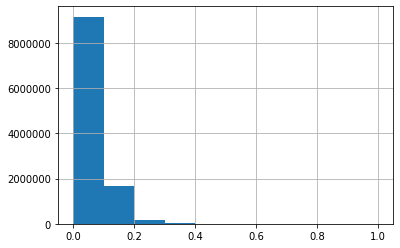

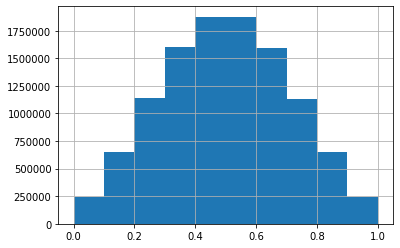

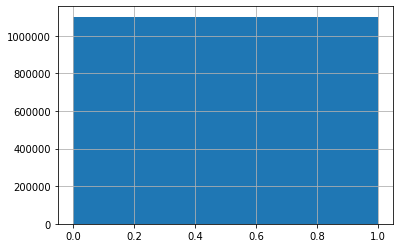

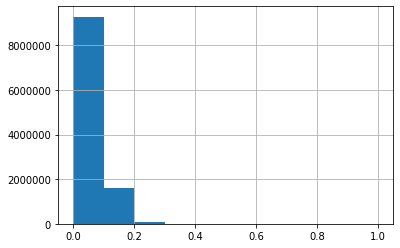

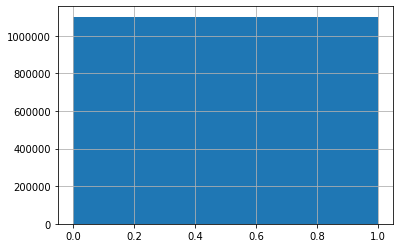

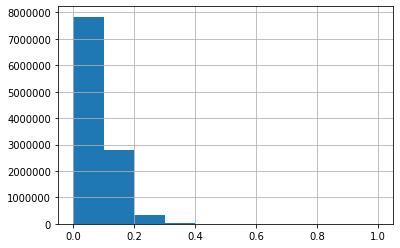

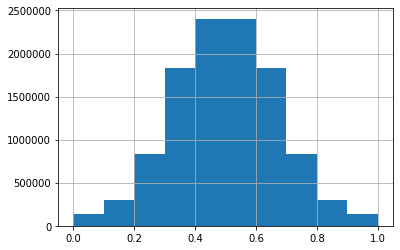

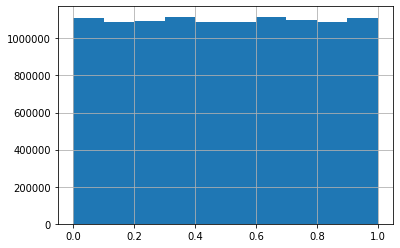

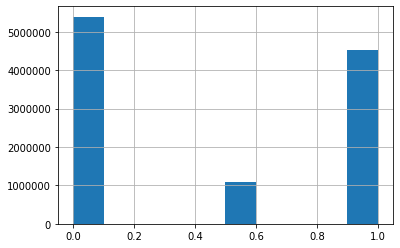

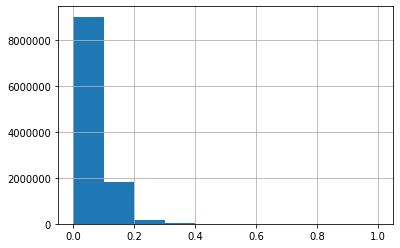

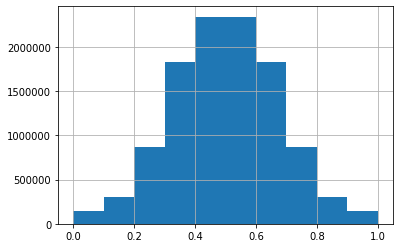

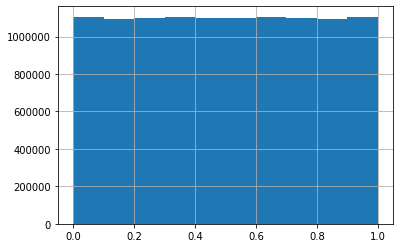

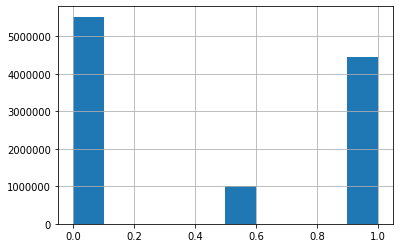

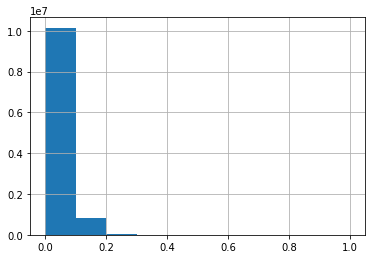

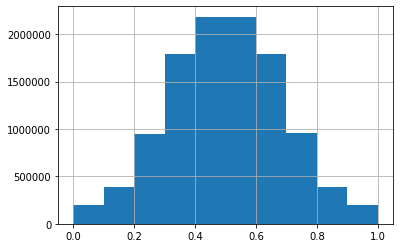

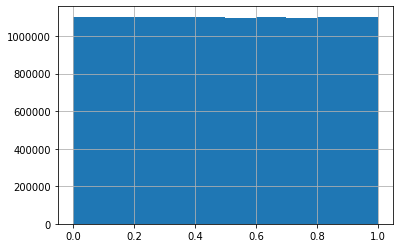

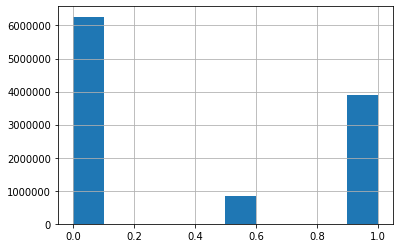

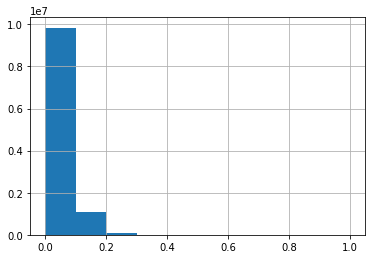

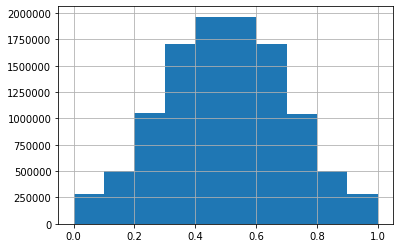

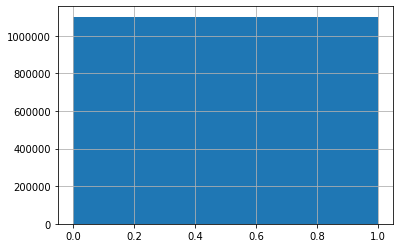

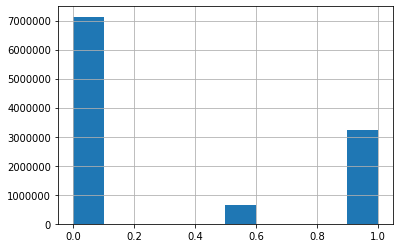

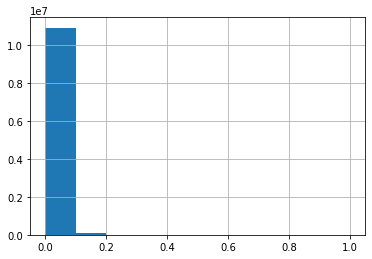

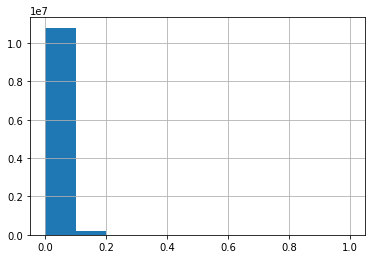

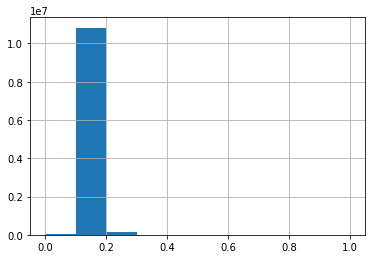

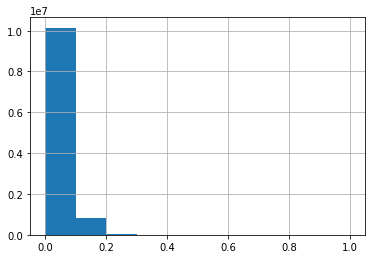

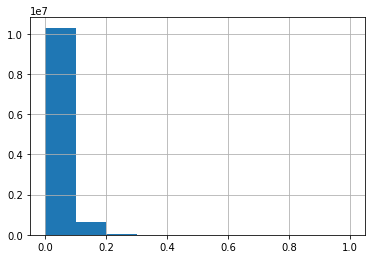

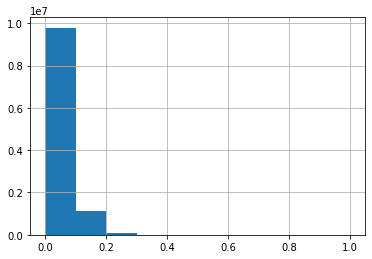

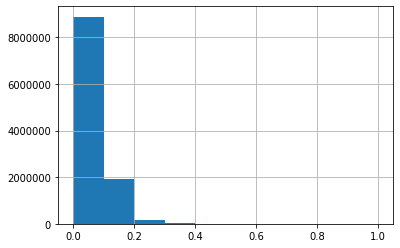

In [217]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [218]:
from keras.applications import Xception
from keras.utils import multi_gpu_model

In [267]:


mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [281]:
with mirrored_strategy.scope():
    model_higgs = tf.keras.Sequential()
    model_higgs.add(layers.Dense(10, activation = 'tanh'))
    model_higgs.add(layers.Dense(10, activation = 'tanh'))
    model_higgs.add(layers.Dense(10, activation = 'tanh'))
    #model_higgs.add(layers.Dense(10, activation = 'tanh'))
    #model_higgs.add(layers.Dense(10, activation = 'tanh'))
    model_higgs.add(layers.Dense(2, activation = 'tanh'))
    
    model_higgs.compile(optimizer=tf.optimizers.SGD(learning_rate = 0.05),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    
    log_dir = 'higgs_logs'
    tb_higgs = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.tree import export_graphviz

import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot


keras.utils.plot_model(model_higgs, 'model_higgs.png')

In [282]:
x1.shape

(11000000, 28)

In [283]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=100)

In [284]:
model_higgs.fit(x_train.values, y_train, validation_data=(x_test.values, y_test), epochs=10, batch_size=100, callbacks=[tb_higgs])

Train on 8800000 samples, validate on 2200000 samples
Epoch 1/10
8800000/8800000 [==============================] - 275s 31us/sample - loss: 0.6932 - accuracy: 0.5294 - val_loss: 0.6931 - val_accuracy: 0.5298
Epoch 2/10
8800000/8800000 [==============================] - 258s 29us/sample - loss: 0.6931 - accuracy: 0.5293 - val_loss: 0.6931 - val_accuracy: 0.5296
Epoch 3/10
8800000/8800000 [==============================] - 258s 29us/sample - loss: 0.6931 - accuracy: 0.5292 - val_loss: 0.6931 - val_accuracy: 0.5296
Epoch 4/10
8800000/8800000 [==============================] - 260s 30us/sample - loss: 0.6931 - accuracy: 0.5292 - val_loss: 0.6931 - val_accuracy: 0.5296
Epoch 5/10
8800000/8800000 [==============================] - 256s 29us/sample - loss: 0.6931 - accuracy: 0.5292 - val_loss: 0.6931 - val_accuracy: 0.5296
Epoch 6/10
8800000/8800000 [==============================] - 255s 29us/sample - loss: 0.6931 - accuracy: 0.5292 - val_loss: 0.6931 - val_accuracy: 0.5296
Epoch 7/10
88000

In [285]:
predictions = model_higgs.predict(x_test.values)

In [286]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))


Prediction: [1 1 1 ... 1 1 1]
   Actuals: [1. 1. 1. ... 1. 0. 1.]


In [287]:
test_accuracy = tf.keras.metrics.Accuracy()

In [288]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 52.963%
